In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imread_collection, imshow, imshow_collection
from scipy.signal import convolve2d
from scipy.fft import fft2,fftshift
from skimage.filters import threshold_otsu
from skimage.transform import resize, rescale, rotate

C:\Users\nushi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
cat_image = imread("domestic-cat/dc (1).jpg")

In [4]:
cat_image.shape

(183, 275, 3)

In [5]:
all_collection_domestic = imread_collection("domestic-cat/*")

In [6]:
domestic_cats = list(all_collection_domestic)

In [7]:
len(domestic_cats)

64

In [8]:
domestic_cats[0] == cat_image

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

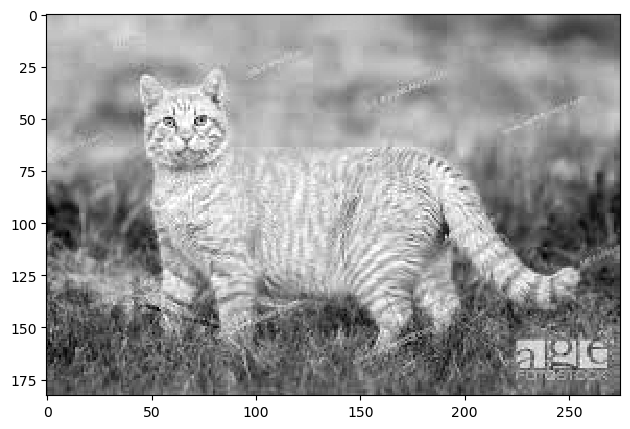

In [9]:
imshow(cat_image[:,:,0])

<function matplotlib.pyplot.show(close=None, block=None)>

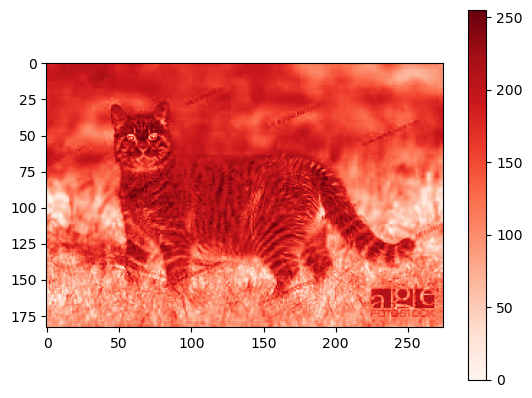

In [10]:
plt.imshow(cat_image[:,:,0], cmap = "Reds")
plt.colorbar()
plt.show

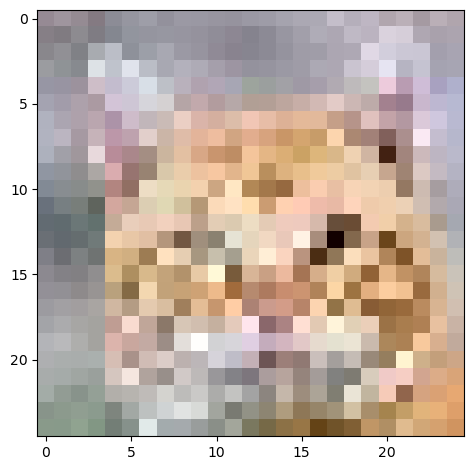

In [11]:
imshow(cat_image[25:75:2,40:90:2]) # става 4 пъти по-малко с :2, пропуска се всеки 2-ри ред и 2-ра колона

In [12]:

cat_image.astype(float)

array([[[185., 188., 193.],
        [183., 186., 191.],
        [179., 182., 187.],
        ...,
        [104., 163.,  83.],
        [104., 163.,  83.],
        [104., 163.,  83.]],

       [[186., 189., 194.],
        [184., 187., 192.],
        [181., 184., 189.],
        ...,
        [100., 159.,  79.],
        [100., 159.,  79.],
        [100., 159.,  79.]],

       [[189., 192., 197.],
        [187., 190., 195.],
        [184., 187., 192.],
        ...,
        [ 96., 153.,  74.],
        [ 96., 153.,  74.],
        [ 96., 153.,  74.]],

       ...,

       [[ 55., 145.,  55.],
        [ 75., 164.,  72.],
        [ 73., 156.,  64.],
        ...,
        [ 96., 177., 100.],
        [ 96., 177., 100.],
        [ 96., 177., 100.]],

       [[ 68., 158.,  68.],
        [ 85., 174.,  82.],
        [ 80., 163.,  71.],
        ...,
        [ 83., 172.,  88.],
        [ 82., 171.,  87.],
        [ 82., 171.,  87.]],

       [[ 78., 168.,  78.],
        [ 93., 182.,  90.],
        [ 85., 1

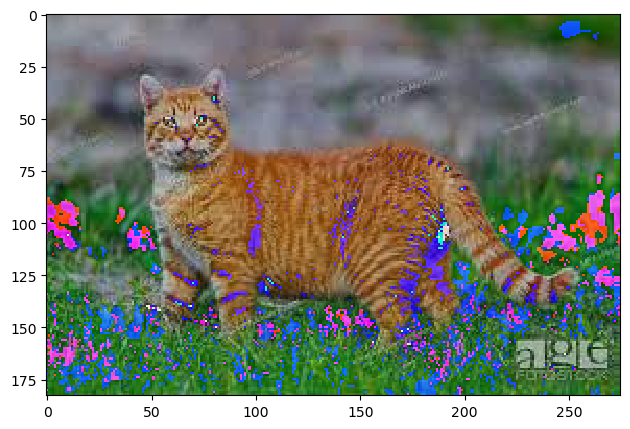

In [13]:
imshow(cat_image+ 200)

C:\Users\nushi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


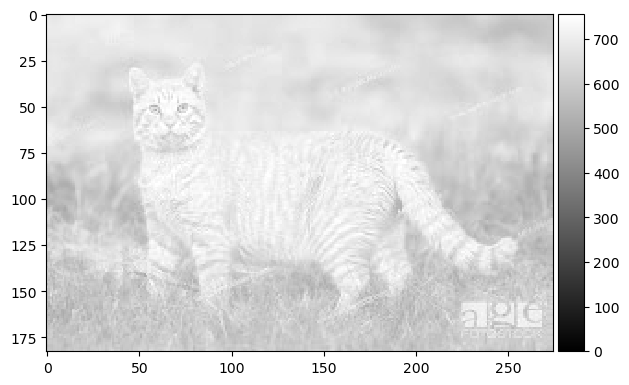

In [14]:
imshow(cat_image[:,:,0] + 500, vmin = 0, vmax = 500 + 256, cmap = "grey") # raboti samo na 1 kanal

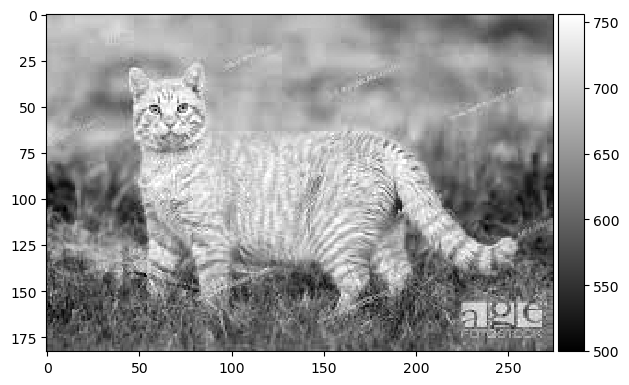

In [15]:
imshow(cat_image[:,:,0] + 500, vmin = 500, vmax = 500 + 256, cmap = "grey")

In [16]:
cat_image_for_histogram = cat_image[:,:,0].ravel()

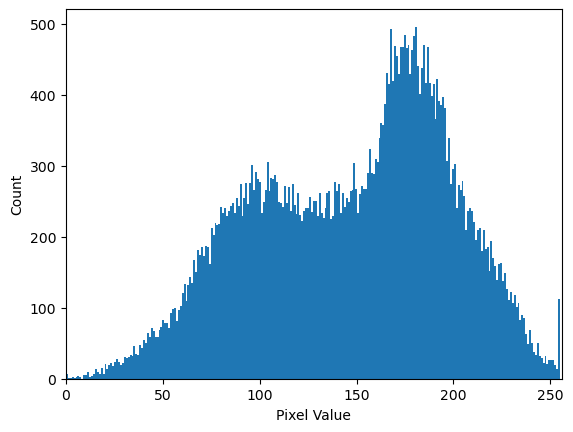

In [18]:
plt.hist(cat_image_for_histogram, bins = 256)

plt.xlabel("Pixel Value")
plt.ylabel("Count")

plt.xlim(0,256)

plt.show()

In [19]:
cat_image[:,:,0].reshape(-1,1).shape

(50325, 1)

C:\Users\nushi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


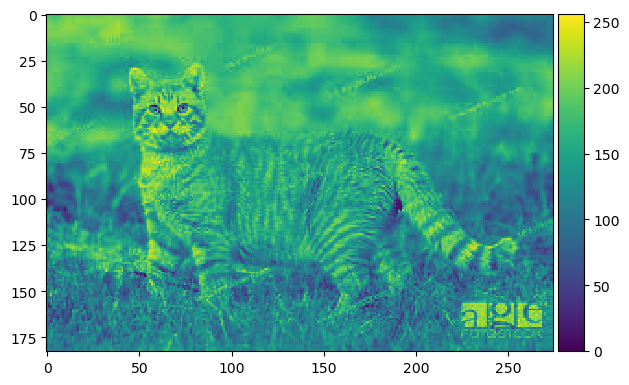

In [20]:
imshow(cat_image.mean(axis = 2), vmin = 0, vmax = 256)

In [21]:
(red,green,blue) = cat_image[:, :, 0], cat_image[:, :, 1], cat_image[:, :, 2]

In [22]:
image_grey = 0.299 * red + 0.587 * green + 0.114 * blue

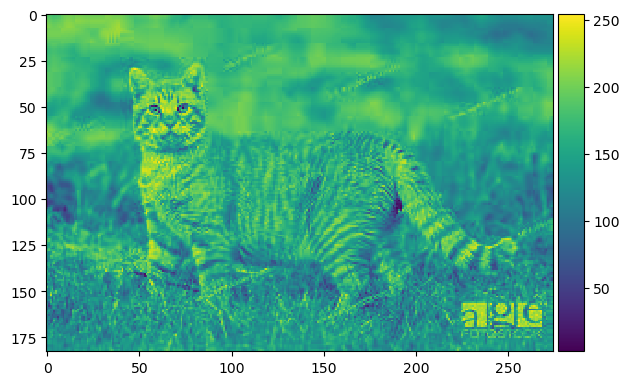

In [23]:
imshow(image_grey)

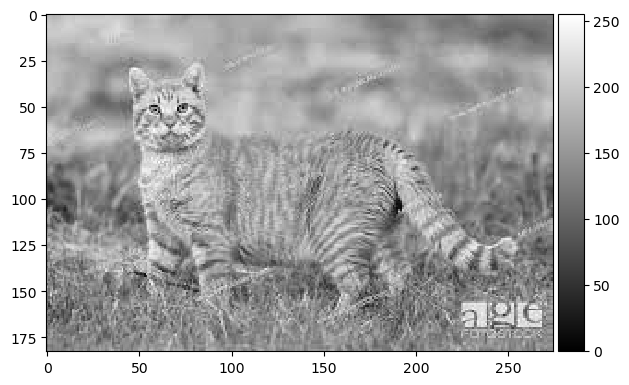

In [24]:
imshow(image_grey, cmap = "grey", vmin = 0, vmax = 255)

In [25]:
cat_image_masked = cat_image.copy()

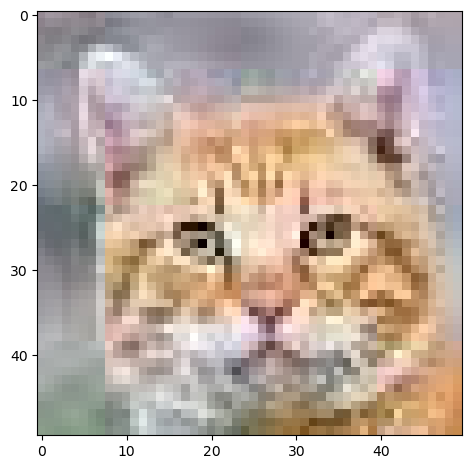

In [26]:
imshow(cat_image_masked[25:75,40:90]) 

In [27]:
cat_image_masked[25:75,40:90] = 0

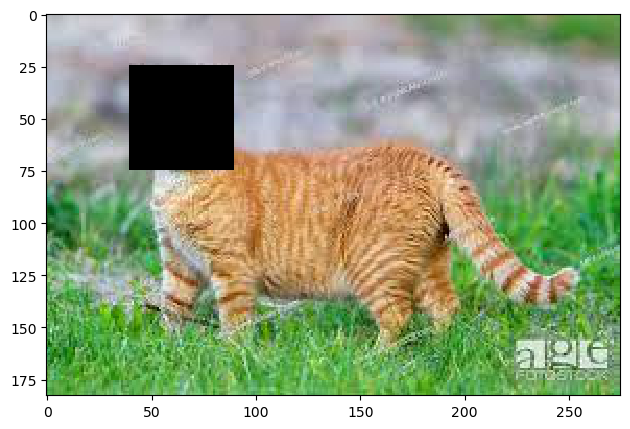

In [28]:
imshow(cat_image_masked)

In [29]:
(cat_image/255).dtype

dtype('float64')

In [30]:
cat_image_normalized = (cat_image/255.0)

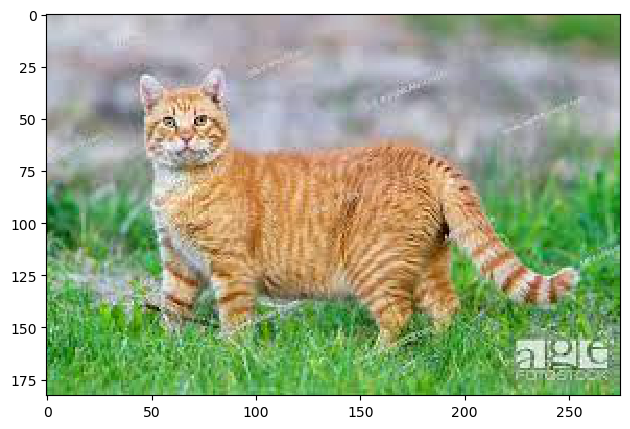

In [31]:
imshow(cat_image_normalized)

In [32]:
filter_conv = np.array([
    [8,0,1],
    [0,1,0],
    [1,0,5]
])

In [33]:
filt_result = convolve2d(cat_image[:,:,0], filter_conv, mode = "same")

In [34]:
filt_result.min(), filt_result.max()

(54, 4024)

C:\Users\nushi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


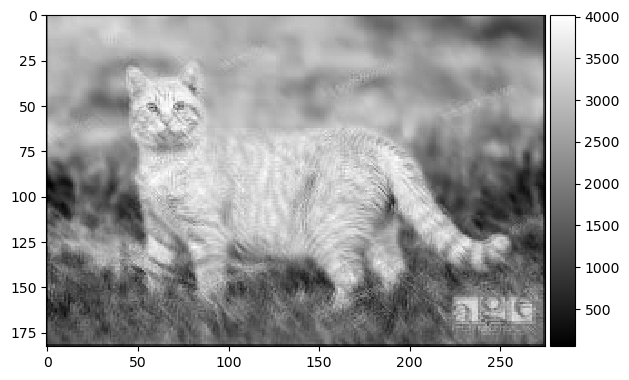

In [35]:
imshow(filt_result, cmap = "grey")

In [36]:
cat_image_binary = cat_image.copy()

In [37]:
cat_image_binary.mean()

143.30751448915385

In [38]:
cat_image_binary[cat_image_binary < 10] = 0
cat_image_binary[cat_image_binary >= 100] = 255

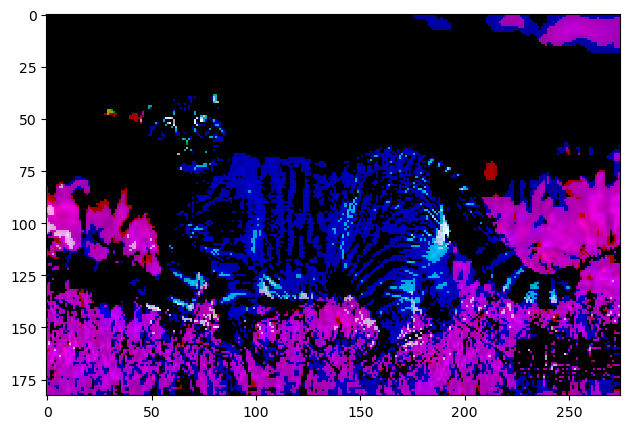

In [39]:
imshow(255 - cat_image_binary)

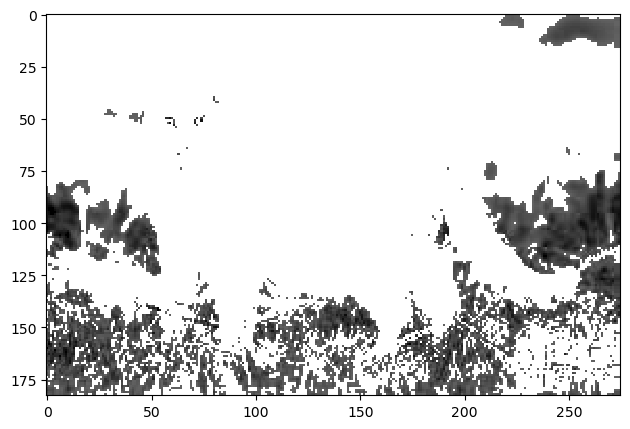

In [40]:
imshow(cat_image_binary[:,:,0], cmap = "grey")

In [41]:
threshold_otsu(cat_image[:,:,0])

140

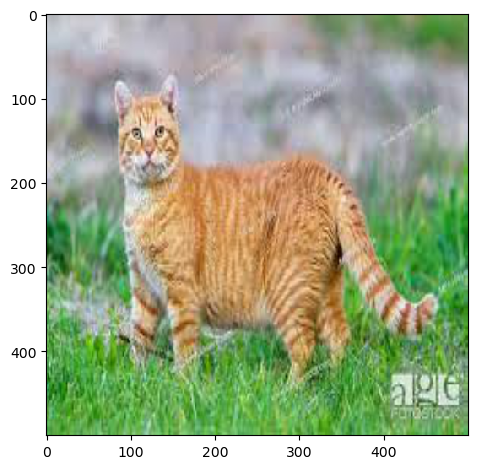

In [42]:
imshow(resize(cat_image, (500,500), order = 5))
imshow(resize(cat_image, (500,500), order = 1))

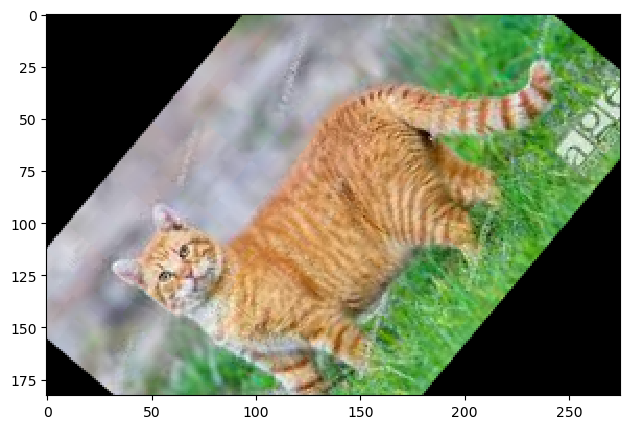

In [43]:
imshow(rotate(cat_image, 50))

In [44]:
fft2(cat_image)

array([[[ 1.30716000e+05    -0.j        ,
         -4.39500000e+02 -4161.25206518j,
         -4.39500000e+02 +4161.25206518j],
        [-2.38955429e+03-14260.7802166j ,
          3.24364173e+03 -2442.67849711j,
         -4.62680633e+03 +1979.09431754j],
        [ 4.08147042e+03 -7097.94046097j,
          1.59288688e+03  +463.21596448j,
         -1.34020467e+03  -482.51009397j],
        ...,
        [-4.52669561e+03 +3048.93990469j,
         -1.22411598e+03  -715.50261116j,
          7.94286371e+02  +310.64653762j],
        [ 4.08147042e+03 +7097.94046097j,
         -1.34020467e+03  +482.51009397j,
          1.59288688e+03  -463.21596448j],
        [-2.38955429e+03+14260.7802166j ,
         -4.62680633e+03 -1979.09431754j,
          3.24364173e+03 +2442.67849711j]],

       [[ 1.30470000e+05    -0.j        ,
         -5.01000000e+02 -4167.31424301j,
         -5.01000000e+02 +4167.31424301j],
        [-2.53709520e+03-14474.91040577j,
          3.20242445e+03 -2523.10674804j,
         -4.

In [45]:
fft_amplitude = (np.abs(fftshift(fft2(cat_image[:,:,0]))))

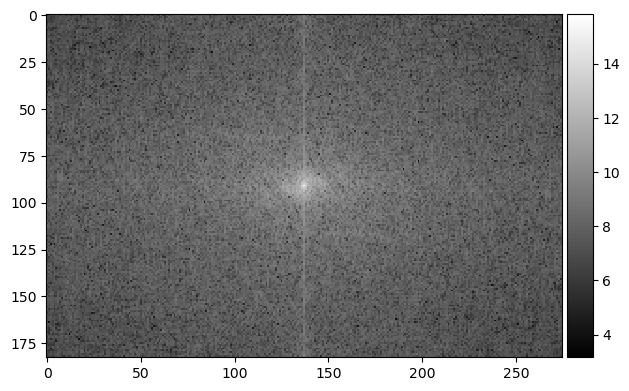

In [46]:
imshow(np.log(fft_amplitude), cmap = "grey")